# LET'S GROW MORE INTERNSHIP -2023 APRIL
## NAME=SWARAJ SOLANKE

### task:2 Stock Market Prediction And Forecasting Using Stacked LSTM:

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# for creating lstm model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf


# loading the dataset

In [3]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


## chaning the datatype of date

In [10]:
df=df[["Date","Close"]]
df.Date=pd.to_datetime(df.Date) # for changing the datatype


C:\Users\rajpu\AppData\Local\Temp\ipykernel_9732\960308248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date=pd.to_datetime(df.Date) # for changing the datatype


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2035 non-null   datetime64[ns]
 1   Close   2035 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.9 KB


In [22]:
df1=df.reset_index()['Close']


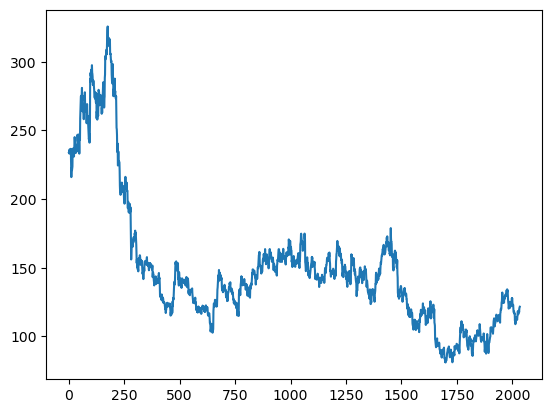

In [23]:
plt.plot(df1)

### since we are using LSTM model no need of stationary data .timeseirs done by arima model then need to make the stationary data as here p value is lees than 0.05 so reject the null hypothesis

In [17]:
from  statsmodels.tsa.stattools import adfuller

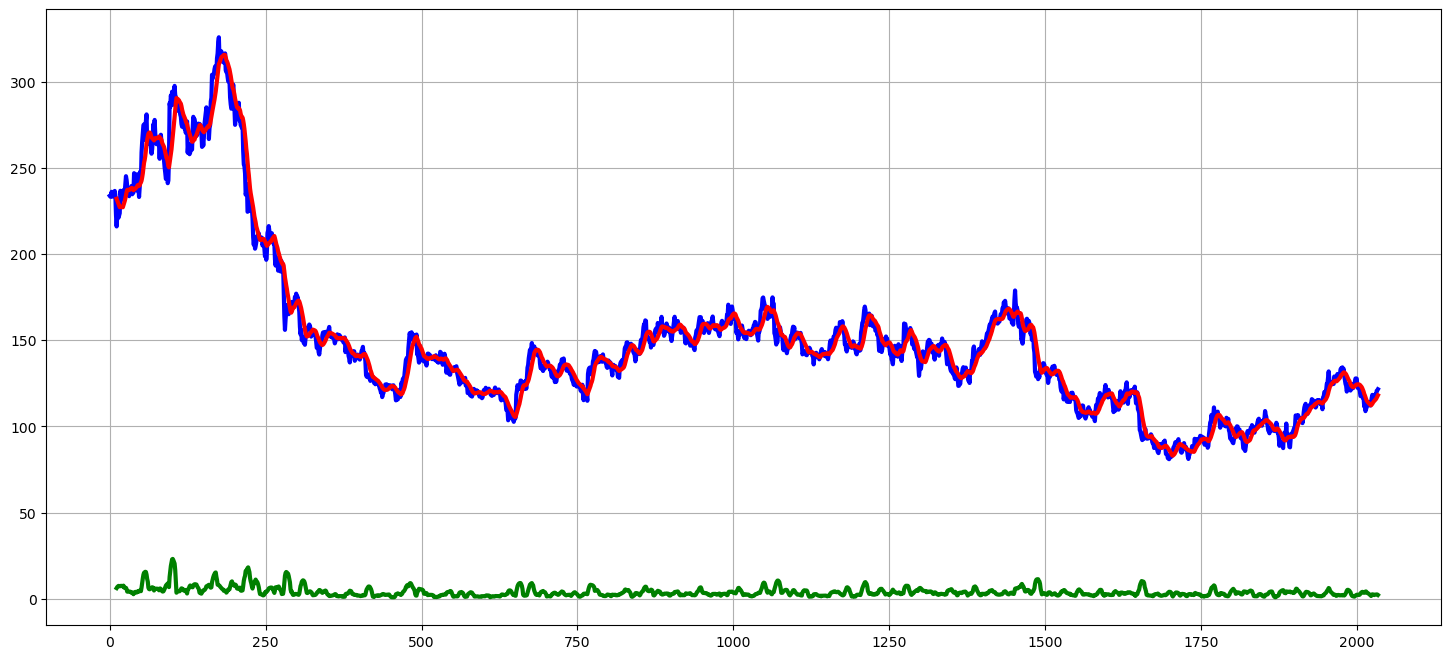

test staticstics            -1.738101
p-value                      0.411596
no of legs                  16.000000
no of observation used    2018.000000
critical value (1%)         -3.433595
critical value (5%)         -2.862973
critical value (10%)        -2.567533
dtype: float64


In [27]:
# test for stationary 
def test_stationary(timeseries):
    rolemean=timeseries.rolling(12).mean()
    rolestd=timeseries.rolling(12).std()
    plt.figure(figsize=(18,8))
    plt.grid("both")
    plt.plot(timeseries ,color="blue",label="original",linewidth=3)
    plt.plot(rolemean, color="red",label="rolling mean",linewidth=3)
    plt.plot(rolestd,color='green',label="rolling std",linewidth=3)
    plt.show()
    adft=adfuller(timeseries ,autolag="AIC")
    output=pd.Series(adft[0:4],index=["test staticstics ","p-value","no of legs","no of observation used"])
    for key,values in adft[4].items():
        output["critical value (%s)"% key]=values
    print(output)
test_stationary(df1)
    
    

### scaling the data by using min max scaler algorithm

In [33]:
# scale the data by using min max scaler 
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #since it contain the single feature ,reshape it to have 2 dimensional
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

## changing the 1dimension array into 2 dimensional

In [35]:
df1.ndim # chnaging the data from 1d to 2d 
df1.shape

(2035, 1)

# training the model
## from  one of the column itself we  are making training and testing the data so spliting on 70.30 ratio


In [42]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]


In [43]:
train_data=df1[0:training_size]


In [44]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [45]:
training_size,test_size

(1424, 611)

In [47]:
# over here i have created the x train dataset but its in list
t=[]
dataset=train_data
for i in range(len(dataset)-100-1):
    a=dataset[i:(i+100),0]
    t.append(a)
t

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
        0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
        0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
        0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
        0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
        0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
        0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
        0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
        0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
        0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
        0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
        0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771,
        0.7495915 , 0.76960784, 0.74754902, 0.75428922, 0.76143791,
        0.74979575, 0.73999183, 0.72406046, 0.73488562, 0.76021242,
        0.79411765, 0.78104575, 0.80412582, 0.77

In [56]:
# convert an array of values into datset matxic
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [57]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [58]:
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.26041667, 0.2563317 , 0.24652778, ..., 0.33415033, 0.33986928,
        0.34681373],
       [0.2563317 , 0.24652778, 0.23611111, ..., 0.33986928, 0.34681373,
        0.3500817 ],
       [0.24652778, 0.23611111, 0.25204248, ..., 0.34681373, 0.3500817 ,
        0.32618464]])

## converting one D array into 3D

In [60]:
# coverting the array into 3D array
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [61]:
x_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.26041667],
        [0.2563317 ],
        [0.24652778],
        ...,
        [0.33415033],
        [0.33986928],
        [0.34681373]],

       [[0.2563317 ],
        [0.24652778],
        [0.23611111],
        ...,
        [0.33986928],
        [0.34681373],
        [0.3500817 ]],

       [[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.34681373],
        [0.3500817 ],
        [0.32618464]]])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


### sequential-machine learning -models that input or output data  sequence are know as sequence models

#### dense-Dense layer is simple layer of neurons in which each neuron receives input from all neuron of previous layer,thus called as dense layer is used to classify image based on output from convential layer


In [75]:
# sequential data and then dense data 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #there the batch size is none ,so it will take any nimer of batches
model.add(LSTM(50 ,return_sequences=True)) #return sequences will output all the hidden states of each time steps
model.add(LSTM(50)) # 50 is neuron we are passing
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")#this adam optimize the value faster than other optimizer algorithm .its

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### why epoch need to be used ? small batches of data are show to network ,one run of when entire training data is shown to model in batches error is calculated is called epoch.the epochs are to be run till the error is reducing 


In [77]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 10s 205ms/step - loss: 0.0269 - val_loss: 0.0067
Epoch 2/100
21/21 [==============================] - 3s 155ms/step - loss: 0.0028 - val_loss: 8.8096e-04
Epoch 3/100
21/21 [==============================] - 3s 159ms/step - loss: 0.0017 - val_loss: 9.2323e-04
Epoch 4/100
21/21 [==============================] - 4s 169ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
21/21 [==============================] - 3s 158ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
21/21 [==============================] - 3s 155ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
21/21 [==============================] - 3s 156ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 3s 160ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/100
21/21 [==============================] - 3s 158ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
21/21 [==============================] - 3s 158ms/step - loss: 0.0011

21/21 [==============================] - 6s 272ms/step - loss: 2.5462e-04 - val_loss: 2.0524e-04
Epoch 77/100
21/21 [==============================] - 6s 271ms/step - loss: 2.7020e-04 - val_loss: 2.5239e-04
Epoch 78/100
21/21 [==============================] - 6s 271ms/step - loss: 3.5901e-04 - val_loss: 4.3685e-04
Epoch 79/100
21/21 [==============================] - 6s 271ms/step - loss: 3.1857e-04 - val_loss: 2.2353e-04
Epoch 80/100
21/21 [==============================] - 6s 269ms/step - loss: 2.5385e-04 - val_loss: 2.1924e-04
Epoch 81/100
21/21 [==============================] - 6s 267ms/step - loss: 2.4038e-04 - val_loss: 2.2321e-04
Epoch 82/100
21/21 [==============================] - 6s 269ms/step - loss: 2.8036e-04 - val_loss: 1.9430e-04
Epoch 83/100
21/21 [==============================] - 6s 270ms/step - loss: 2.5396e-04 - val_loss: 2.0710e-04
Epoch 84/100
21/21 [==============================] - 6s 274ms/step - loss: 2.6561e-04 - val_loss: 2.0216e-04
Epoch 85/100
21/21 [===

In [80]:
import tensorflow as tf

In [79]:
tf.__version__

'2.12.0'

In [84]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

16/16 [==============================] - 1s 57ms/step


In [85]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [90]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.018119051839208613

In [91]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.01922994966665206

# predication of stock 

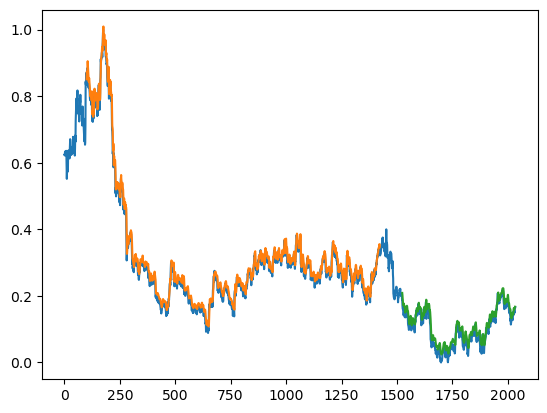

In [95]:
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,  :]=train_predict
# shift test prediction for plotting 
testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictation 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [96]:
len(test_data)

611

In [97]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [117]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [118]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=100
next_number_days=30
i=0
while(i<next_number_days):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1
        
print(lst_output)
        


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).